IFI8420 (Business Machine Learning) 
Homework 3 (Group)

Student's name: Eferhire Aganbi

#Import required packages

In [1]:
!pip install dmba

In [2]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import seaborn as sns
from statsmodels.api import add_constant
from statsmodels.formula.api import ols

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

# State Business question:

Imagine that we are a firm of data scientists/analysts employed by a company that owns a chain of supermarket stores across states in the US. Our consulting firm has been hired to conduct a survey on consumers' perception of cereals brands stocked by the supermarket; the goal is to identify what informs customers' decision for picking a particular brand as a healthier option.  We have been asked to examine which nutrients consumers considered more important when selecting a healthy cereal brand. If successful, our analysis will help the company decide on key improvements on popular cereal brands. 

In [3]:
# upload data as csv.file 

cereal_df = pd.read_csv('Cereals.csv')

In [4]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [5]:
cereal_df.shape

(77, 16)

In [6]:
# introduce dataset

cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [7]:
cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


<AxesSubplot:>

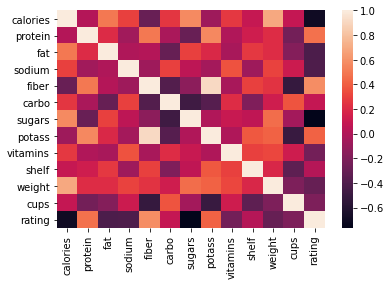

In [8]:
corr = cereal_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

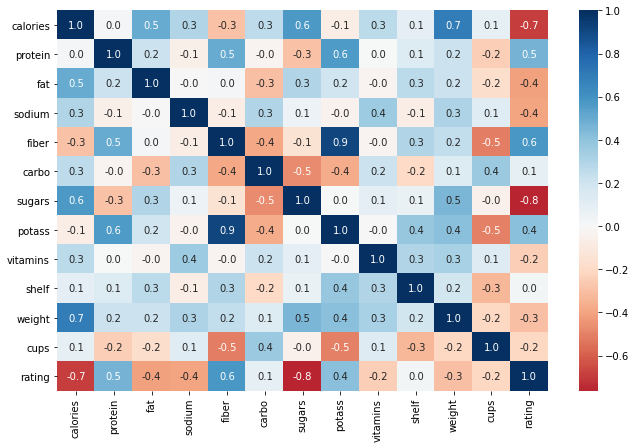

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

In [10]:
# Data pre-processing and cleaning
cereal_df = cereal_df.rename(columns={'type': 'type_cereal'})       #changes column name 'type' to 'type_cereal'
cereal_df.columns

Index(['name', 'mfr', 'type_cereal', 'calories', 'protein', 'fat', 'sodium',
       'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight',
       'cups', 'rating'],
      dtype='object')

In [11]:
cereal_df.isna().sum()                                    #checking for missing values

name           0
mfr            0
type_cereal    0
calories       0
protein        0
fat            0
sodium         0
fiber          0
carbo          1
sugars         1
potass         2
vitamins       0
shelf          0
weight         0
cups           0
rating         0
dtype: int64

In [12]:
# remove rows with missing values 
reduced_df = cereal_df.dropna()
print('Number of rows after removing rows with missing values: ', len(reduced_df))

Number of rows after removing rows with missing values:  74


In [13]:
mediancarbo = cereal_df['carbo'].median()
cereal_df.carbo = cereal_df.carbo.fillna(value=mediancarbo)
print('Number of rows with valid carbo values after filling NA values: ',
      cereal_df['carbo'].count())

Number of rows with valid carbo values after filling NA values:  77


In [14]:
mediansugars = cereal_df['sugars'].median()
cereal_df.sugars = cereal_df.sugars.fillna(value=mediansugars)
print('Number of rows with valid sugars values after filling NA values: ',
      cereal_df['sugars'].count())

Number of rows with valid sugars values after filling NA values:  77


In [15]:
medianpotass = cereal_df['potass'].median()
cereal_df.potass = cereal_df.potass.fillna(value=medianpotass)
print('Number of rows with valid potass values after filling NA values: ',
      cereal_df['potass'].count())

Number of rows with valid potass values after filling NA values:  77


In [16]:
cereal_df.isna().sum()   

name           0
mfr            0
type_cereal    0
calories       0
protein        0
fat            0
sodium         0
fiber          0
carbo          0
sugars         0
potass         0
vitamins       0
shelf          0
weight         0
cups           0
rating         0
dtype: int64

In [17]:
#Run linear Regression Analysis

predictors = ['type_cereal','calories','protein','fat','sodium','fiber','carbo', 
              'sugars','potass', 'vitamins', 'shelf','weight','cups']
outcome = 'rating'

# partition data
X = pd.get_dummies(cereal_df[predictors], drop_first=True)
y = cereal_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1) #X_train, X_test, y_train, y_test

cereal_lm = LinearRegression()
cereal_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', cereal_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': cereal_lm.coef_}))

# print performance measures
regressionSummary(train_y, cereal_lm.predict(train_X))

intercept  55.278307023423174
        Predictor  coefficient
0        calories    -0.231811
1         protein     3.277004
2             fat    -1.574873
3          sodium    -0.053469
4           fiber     3.398189
5           carbo     1.124065
6          sugars    -0.692841
7          potass    -0.032716
8        vitamins    -0.052309
9           shelf     0.065851
10         weight    -0.256659
11           cups    -0.222230
12  type_cereal_H     3.171197

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.4029
            Mean Absolute Error (MAE) : 0.1581
          Mean Percentage Error (MPE) : -0.0154
Mean Absolute Percentage Error (MAPE) : 0.4335


In [18]:
pred_y = cereal_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, cereal_lm))
print('AIC : ', AIC_score(train_y, pred_y, cereal_lm))
print('BIC : ', BIC_score(train_y, pred_y, cereal_lm))

adjusted r2 :  0.9990191875501467
AIC :  84.0405069617449
BIC :  113.59488566502672


# Backward elimination

In [19]:

def train_model(variables):
    model = LinearRegression()
    model.fit(valid_X[variables], valid_y)
    return model

def score_model(model, variables):
    return AIC_score(valid_y, model.predict(valid_X[variables]), model)

## this is for training set
best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

## this is for test set
best_model_test, best_variables_test = backward_elimination(valid_X.columns, train_model, score_model, verbose=True)

print(best_variables_test)


Variables: calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, shelf, weight, cups, type_cereal_H
Start: score=86.15
Step: score=84.32, remove weight
Step: score=82.43, remove potass
Step: score=81.49, remove carbo
Step: score=80.14, remove shelf
Step: score=80.14, remove None
['calories', 'protein', 'fat', 'sodium', 'fiber', 'sugars', 'vitamins', 'cups', 'type_cereal_H']
Variables: calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, shelf, weight, cups, type_cereal_H
Start: score=86.15
Step: score=84.32, remove weight
Step: score=82.43, remove potass
Step: score=81.49, remove carbo
Step: score=80.14, remove shelf
Step: score=80.14, remove None
['calories', 'protein', 'fat', 'sodium', 'fiber', 'sugars', 'vitamins', 'cups', 'type_cereal_H']


In [20]:
pred_y = cereal_lm.predict(valid_X)

normal_reg_r2=adjusted_r2_score(valid_y, pred_y, cereal_lm)

print('adjusted r2 : ', adjusted_r2_score(valid_y, pred_y, cereal_lm))
print('AIC : ', AIC_score(valid_y, pred_y, cereal_lm))
print('BIC : ', BIC_score(valid_y, pred_y, cereal_lm))

adjusted r2 :  0.8481124145750694
AIC :  150.88678271564768
BIC :  168.55759017086686


## using sequentialFeatureselector which automatically selects the best features bases on their r2 score. it takes range of features and gives out the best feature set

## Here, on the y-axis, the performance label indicates the R-squared values for the different numbers of features.

## Backward Elimination

best_Features ('calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'type_cereal_H')


C:\Users\harin\anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\harin\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


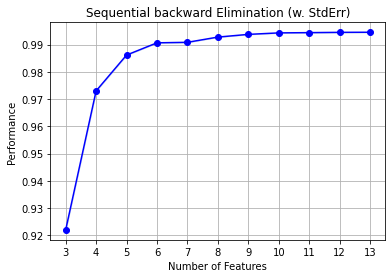

In [21]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(), k_features=(3,X.shape[1]),forward=False,floating=False,scoring = 'r2',cv = 0)



sfs.fit(X,y)
print("best_Features",sfs.k_feature_names_)

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential backward Elimination (w. StdErr)')
plt.grid()
plt.show()


In [22]:
regressionSummary(valid_y, best_model_test.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.8124
            Mean Absolute Error (MAE) : 0.6723
          Mean Percentage Error (MPE) : -0.0628
Mean Absolute Percentage Error (MAPE) : 1.7121


In [23]:
print('adjusted r2 for Backward Selection : ', adjusted_r2_score(valid_y, best_model_test.predict(valid_X[best_variables]), best_model_test))

backward_reg_r2=adjusted_r2_score(valid_y, best_model_test.predict(valid_X[best_variables]), best_model_test)

adjusted r2 for Backward Selection :  0.9920586682594615


# Forward Selection

In [24]:
#Forward selection
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

# print(best_variables)

## for test dataset
best_model_test, best_variables_test = forward_selection(valid_X.columns, train_model, score_model, verbose=True)

print(best_variables_test)

Variables: calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, shelf, weight, cups, type_cereal_H
Start: score=440.43, constant
Step: score=394.38, add sugars
Step: score=346.90, add fiber
Step: score=305.02, add sodium
Step: score=254.77, add fat
Step: score=207.43, add protein
Step: score=192.39, add vitamins
Step: score=189.77, add carbo
Step: score=146.39, add calories
Step: score=110.63, add potass
Step: score=79.41, add type_cereal_H
Step: score=79.41, add None
Variables: calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, shelf, weight, cups, type_cereal_H
Start: score=440.43, constant
Step: score=394.38, add sugars
Step: score=346.90, add fiber
Step: score=305.02, add sodium
Step: score=254.77, add fat
Step: score=207.43, add protein
Step: score=192.39, add vitamins
Step: score=189.77, add carbo
Step: score=146.39, add calories
Step: score=110.63, add potass
Step: score=79.41, add type_cereal_H
Step: score=79.41, add None
['sugars', 'fibe

best_Features ('calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'type_cereal_H')


C:\Users\harin\anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\harin\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


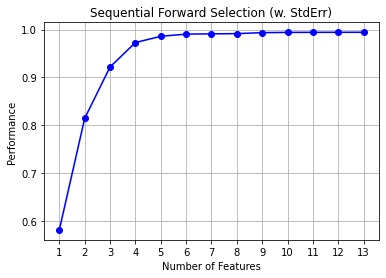

In [25]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(), k_features=(3,X.shape[1]),forward=True,floating=False,scoring = 'r2',cv = 0)



sfs.fit(X,y)
print("best_Features",sfs.k_feature_names_)

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [26]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : -0.8170
       Root Mean Squared Error (RMSE) : 2.9797
            Mean Absolute Error (MAE) : 0.8390
          Mean Percentage Error (MPE) : -1.6824
Mean Absolute Percentage Error (MAPE) : 1.7203


In [27]:
print('adjusted r2 for Forward Selection : ', adjusted_r2_score(valid_y, best_model.predict(valid_X[best_variables]), best_model_test))
forward_reg_r2=adjusted_r2_score(valid_y, best_model.predict(valid_X[best_variables]), best_model_test)

adjusted r2 for Forward Selection :  0.884953408827578


In [28]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, shelf, weight, cups, type_cereal_H
Start: score=440.43, constant
Step: score=394.38, add sugars
Step: score=346.90, add fiber
Step: score=305.02, add sodium
Step: score=254.77, add fat
Step: score=207.43, add protein
Step: score=192.39, add vitamins
Step: score=189.77, add carbo
Step: score=146.39, add calories
Step: score=110.63, add potass
Step: score=79.41, add type_cereal_H
Step: score=79.41, unchanged None
['sugars', 'fiber', 'sodium', 'fat', 'protein', 'vitamins', 'carbo', 'calories', 'potass', 'type_cereal_H']


In [29]:
print('adjusted r2 for Stepwise Selection : ', adjusted_r2_score(valid_y, best_model.predict(valid_X[best_variables]), best_model))

adjusted r2 for Stepwise Selection :  0.884953408827578


In [30]:
#Lasso regularized method
lasso = Lasso(normalize=True, alpha=1)
lasso.fit(train_X, train_y)
regressionSummary(valid_y, lasso.predict(valid_X))

lasso_cv = LassoCV(normalize=True, cv=5)
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))
print('Lasso-CV chosen regularization: ', lasso_cv.alpha_)
print(lasso_cv.coef_)
print(adjusted_r2_score(valid_y,lasso_cv.predict(valid_X),lasso_cv))
lasso_reg_r2=adjusted_r2_score(valid_y,lasso_cv.predict(valid_X),lasso_cv)


Regression statistics

                      Mean Error (ME) : -1.4245
       Root Mean Squared Error (RMSE) : 8.8176
            Mean Absolute Error (MAE) : 6.9737
          Mean Percentage Error (MPE) : -10.6323
Mean Absolute Percentage Error (MAPE) : 20.1475

Regression statistics

                      Mean Error (ME) : -0.8668
       Root Mean Squared Error (RMSE) : 2.8851
            Mean Absolute Error (MAE) : 0.8928
          Mean Percentage Error (MPE) : -1.8531
Mean Absolute Percentage Error (MAPE) : 1.8958
Lasso-CV chosen regularization:  0.0015752732180653744
[-2.20584716e-01  3.17976788e+00 -1.69959058e+00 -5.34918856e-02
  3.27237399e+00  1.05410123e+00 -7.60076057e-01 -2.79479675e-02
 -5.00911685e-02  3.20549713e-03 -0.00000000e+00 -1.16320886e-01
  2.94588319e+00]
0.8597829604313643


## Ideally, lower RMSE and higher R-squared values are indicative of a good model.
## we have considered R2 -square for our problem.

In [31]:
## From the three different approaches
results={'Normal Regression':normal_reg_r2,'Backward Selection':backward_reg_r2,'Forward Selection':forward_reg_r2,'Lasso penalty Regression':lasso_reg_r2}
results_df=pd.DataFrame(list(results.items()))
results_df.columns=['Methods','R2 Square']
results_df



,Methods,R2 Square
0,Normal Regression,0.848112
1,Backward Selection,0.992059
2,Forward Selection,0.884953
3,Lasso penalty Regression,0.859783


## After training model on different methods , we came to conclusion that based on r2 square value both backward and forward selection features gave the same results with a great r2 square value of 0.884953

## both forward selection and backward selection had selection same features as the best features